## Tutorial : Img2Img with LORA


/home/kcw/.pyenv/versions/3.11.7/envs/vm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
model_index.json: 100%|██████████| 541/541 [00:00<00:00, 1.57MB/s]
text_encoder/pytorch_model.fp16.safetensors not found
Fetching 29 files:   0%|          | 0/29 [00:00<?, ?it/s]





safety_checker/config.json: 100%|██████████| 4.72k/4.72k [00:00<00:00, 13.8MB/s]




Fetching 29 files:   3%|▎         | 1/29 [00:00<00:12,  2.24it/s]


scheduler/scheduler_config.json: 100%|██████████| 308/308 [00:00<00:00, 1.10MB/s]
















text_encoder/config.json: 100%|██████████| 617/617 [00:00<00:00, 969kB/s]


























































































































































































































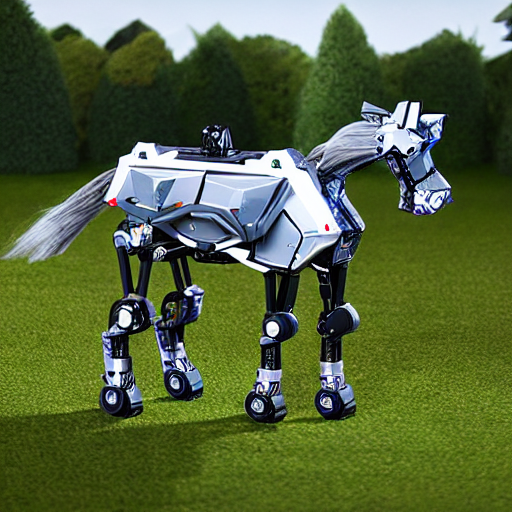

In [2]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch
from PIL import Image


init_image = Image.open("../contents/horse.jpg").convert("RGB").resize((512, 512))

model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda"
)

prompt = "style of <s1><s2>, robotic horse with rocket launcher"
torch.manual_seed(1)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

image

In [8]:
import sys 
sys.path.append('/home/kcw/webtoon-background-generator/lora')
sys.path.append('/home/kcw/webtoon-background-generator/lora/lora_diffusion')
sys.path

['/home/kcw/webtoon-background-generator/lora/scripts',
 '/home/kcw/.pyenv/versions/3.11.7/lib/python311.zip',
 '/home/kcw/.pyenv/versions/3.11.7/lib/python3.11',
 '/home/kcw/.pyenv/versions/3.11.7/lib/python3.11/lib-dynload',
 '',
 '/home/kcw/.pyenv/versions/3.11.7/envs/vm/lib/python3.11/site-packages',
 '/home/kcw/webtoon-background-generator/lora',
 '/home/kcw/webtoon-background-generator/lora',
 '/home/kcw/webtoon-background-generator/lora/lora_diffusion']

100%|██████████| 27/27 [00:01<00:00, 13.51it/s]


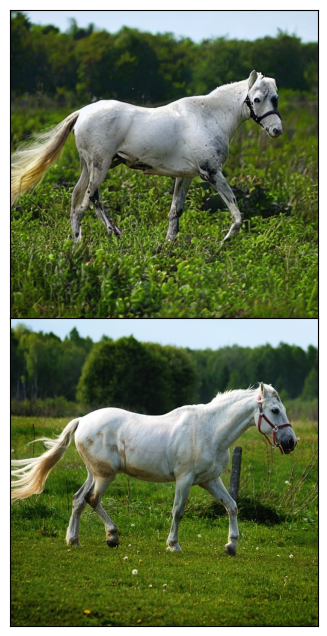

In [12]:
from lora_diffusion import tune_lora_scale, patch_pipe
import matplotlib.pyplot as plt 

# pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
#     "cuda"
# )
# patch_pipe(
#     pipe,
#     "../exps/background_r2/final_lora.safetensors",
#     patch_text=True,
#     patch_ti=True,
#     patch_unet=True,
# )

# pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
#     "cuda"
# )
# patch_pipe(
#     pipe,
#     "../exps/Shinkai/final_lora.safetensors",
#     patch_text=True,
#     patch_ti=True,
#     patch_unet=True,
# )

# init_image = Image.open("../data/init_image/a5.png").convert("RGB").resize((512, 512))
init_image = Image.open("../contents/horse.jpg").convert("RGB").resize((512, 512))

# tune_lora_scale(pipe.unet, 1.0)
# tune_lora_scale(pipe.text_encoder, 1.0)
tune_lora_scale(pipe.unet, 0.4)
tune_lora_scale(pipe.text_encoder, 0.8)
torch.manual_seed(1)
image = pipe(prompt="style of <s1><s2>", 
             image=init_image, strength=0.55, guidance_scale=7.5).images[0]
# image = pipe(prompt="style of <s1><s2>", 
#              image=init_image, strength=0.75, guidance_scale=7.5).images[0]

fig = plt.figure(figsize=(16,8)) # Notice the equal aspect ratio
ax = [fig.add_subplot(2,1,i+1) for i in range(2)]
for a in ax:
    a.set_xticklabels([])
    a.set_yticklabels([])
    a.set_xticks([])
    a.set_yticks([])
    a.set_aspect('equal')

fig.subplots_adjust(wspace=0, hspace=0)

ax[0].imshow(image)
ax[1].imshow(init_image)

plt.show()


<s1>
The tokenizer already contains the token <s1>.
Replacing <s1> embedding.
<s2>
The tokenizer already contains the token <s2>.
Replacing <s2> embedding.


  0%|          | 0/37 [00:00<?, ?it/s]

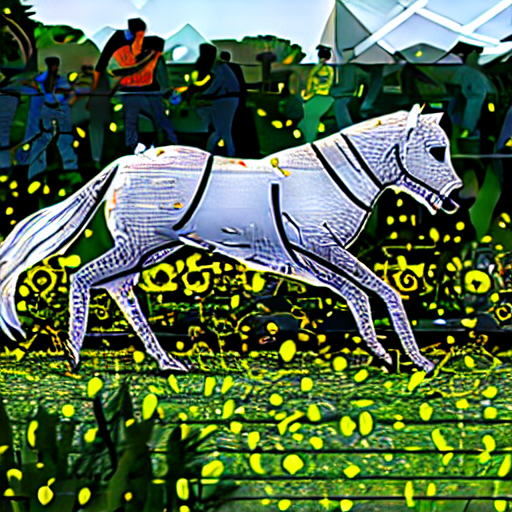

In [3]:
from lora_diffusion import patch_pipe, tune_lora_scale


patch_pipe(pipe, "../example_loras/lora_illust.safetensors", patch_text=True, patch_unet=True, patch_ti=True)

torch.manual_seed(1)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

image


#


  0%|          | 0/37 [00:00<?, ?it/s]

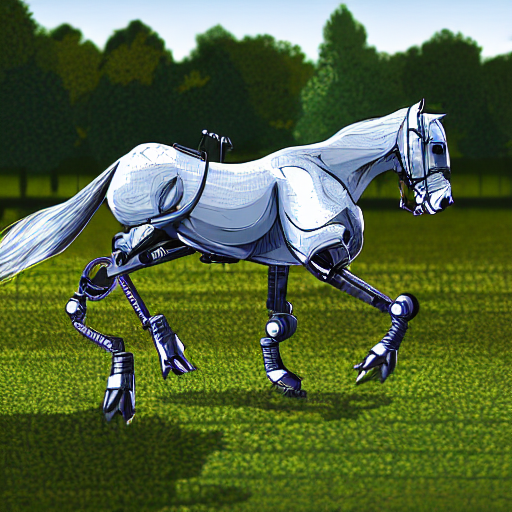

In [8]:
tune_lora_scale(pipe.unet, 0.0)
tune_lora_scale(pipe.text_encoder, 0.0)
# So just the latent inversion will have an effect :  
torch.manual_seed(1)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

image

  0%|          | 0/37 [00:00<?, ?it/s]

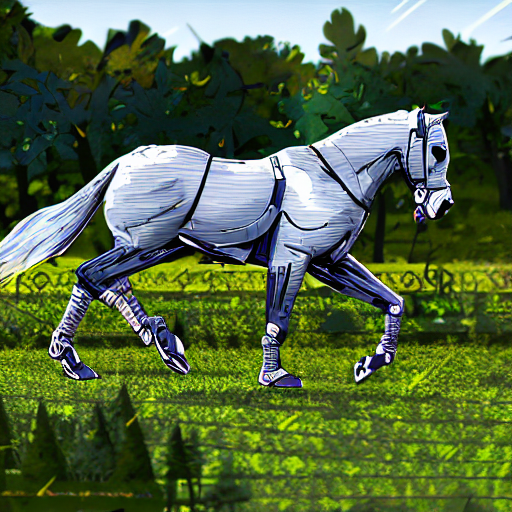

In [10]:
tune_lora_scale(pipe.unet, 0.7)
tune_lora_scale(pipe.text_encoder, 0.3)
# Something in the middle works ok
torch.manual_seed(1)
image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]

image